# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Задача** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

**Описание данных**
    <li>`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
    <li>`balcony` — число балконов
    <li>`ceiling_height` — высота потолков (м)
    <li>`cityCenters_nearest` — расстояние до центра города (м)
    <li>`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
    <li>`first_day_exposition` — дата публикации
    <li>`floor` — этаж
    <li>`floors_total` — всего этажей в доме
    <li>`is_apartment` — апартаменты (булев тип)
    <li>`kitchen_area` — площадь кухни в квадратных метрах (м²)
    <li>`last_price` — цена на момент снятия с публикации
    <li>`living_area` — жилая площадь в квадратных метрах (м²)
    <li>`locality_name` — название населённого пункта
    <li>`open_plan` — свободная планировка (булев тип)
    <li>`parks_around3000` — число парков в радиусе 3 км
    <li>`parks_nearest` — расстояние до ближайшего парка (м)
    <li>`ponds_around3000` — число водоёмов в радиусе 3 км
    <li>`ponds_nearest` — расстояние до ближайшего водоёма (м)
    <li>`rooms` — число комнат
    <li>`studio` — квартира-студия (булев тип)
    <li>`total_area` — общая площадь квартиры в квадратных метрах (м²)
    <li>`total_images` — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

import warnings
warnings.simplefilter("ignore")

### Общая информация о данных

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Посмотрим сколько признаков имеют пропущенные значения

In [5]:
data.isna().any().sum()

14

In [6]:
round(data.isna().any().sum() / data.shape[1], 2)

0.64

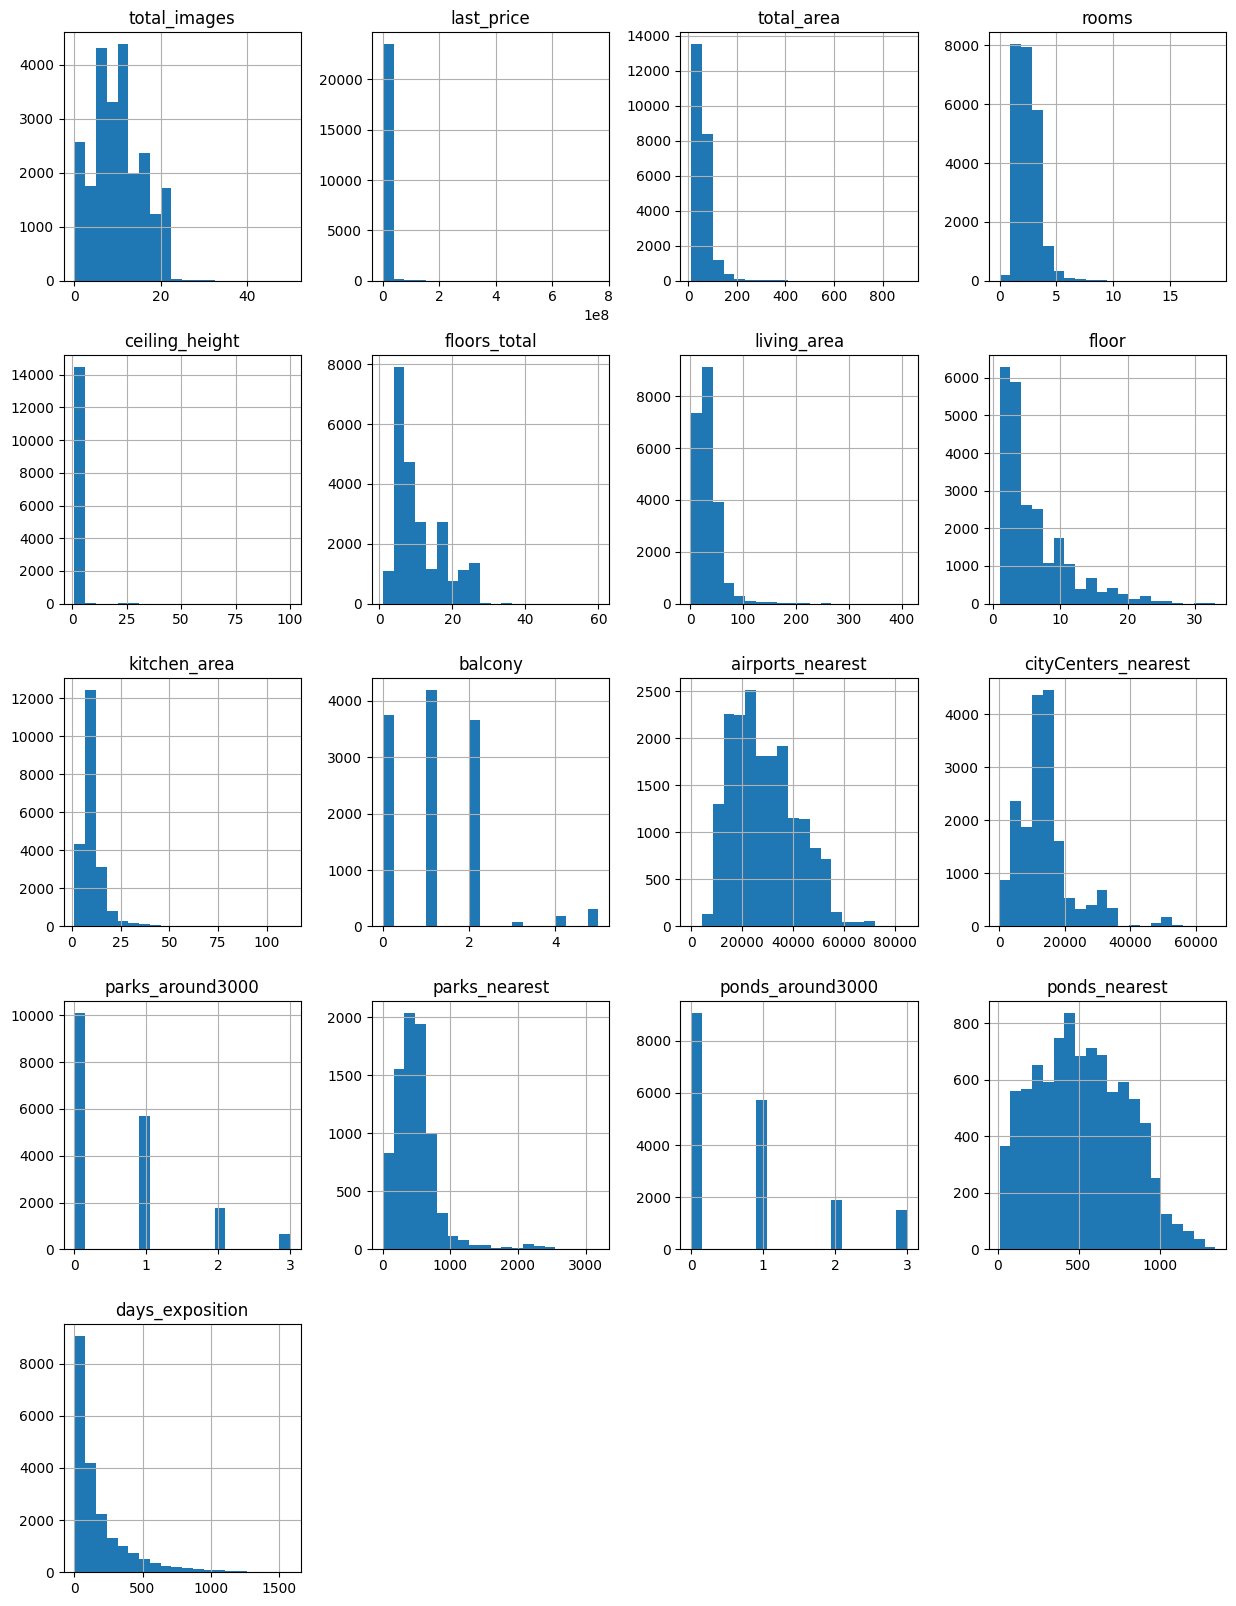

In [7]:
data.hist(bins=20, figsize=(15, 20))
plt.show()

 - В датасете представлено 23698 объявления о продаже квартиры и 22 характеристики по каждому объявлению.
 - Из 22 признаков 14 имеют пропущенные значения:
    - самый менее заполненный признак `is_apartment`, в нём всего 2775 не нулевых значений
 - Гистограммы построенные общим методом DataFrame.hist() дают совсем общее представление о распределениях признаков.
   - наиболее информативны такие гистораммы для признаков, содержащих целочисленные значения, такие как, например, `rooms`, `balcony`, `parks_around3000`, `ponds_around3000`
   - для остальных признаков нужно строить более детальные гистограммы

### Предобработка данных

#### Переименование столбцов

In [8]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [9]:
rename_columns = {
    'cityCenters_nearest':  'city_centers_nearest',
    'parks_around3000': 'parks_around_in_3km_radius',
    'ponds_around3000': 'ponds_around_in_3km_radius'
}
data.rename(columns=rename_columns, inplace=True)

#### Обработка пропусков

In [10]:
data.isna().sum()

total_images                      0
last_price                        0
total_area                        0
first_day_exposition              0
rooms                             0
ceiling_height                 9195
floors_total                     86
living_area                    1903
floor                             0
is_apartment                  20924
studio                            0
open_plan                         0
kitchen_area                   2278
balcony                       11519
locality_name                    49
airports_nearest               5542
city_centers_nearest           5519
parks_around_in_3km_radius     5518
parks_nearest                 15620
ponds_around_in_3km_radius     5518
ponds_nearest                 14589
days_exposition                3181
dtype: int64

Почти две трети признаков имеют пропуски. Рассмотрим каждый по порядку

#####  `ceiling_height` — высота потолков в метрах

In [11]:
data['ceiling_height'].isna().sum()

9195

Для `ceiling_height` 9195 пропусков - больше трети. Подавлющее большинство жилых помещений - квартир имеет высоту потолков примерно от 2,5 до 3 метров. Можно предположить, что среднее и медианное значения окажутся в эти пределах. Заменим пропуски средним или медианным значением в таким случае окажется правдоподобным и на данный момент не противоречит задаче исследования.

Сначала посмотрим набор уникальных значений

In [12]:
ceiling_height_unique_values = data['ceiling_height'].unique()
ceiling_height_unique_values.sort()
ceiling_height_unique_values

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Среди значений `ceiling_height` есть неправдоподобные - выбросы, например, 1 метр или 100 метров. Поэтому лучше для заполнения пропусков использовать медиану.

In [13]:
ceiling_height_median = data['ceiling_height'].median()
ceiling_height_median

2.65

In [14]:
data['ceiling_height'].fillna(ceiling_height_median, inplace=True)

In [15]:
data['ceiling_height'].isna().sum()

0

#####  `floors_total` — всего этажей в доме 

Для `floors_total` всего 86 пропусков. Замена пропусков для этого признака на среднее или медианное значение не является правдоподобным, потому что кваритра может оказаться, например, на 15-ом этаже, а среднее и медианное значения это 11 и 9 соответственно. Пока оставим для этого признака пропуски незаполненными.

In [16]:
print(round(data['floors_total'].mean()))
data['floors_total'].median()

11


9.0

##### `living_area` — жилая площадь в квадратных метрах (м²)

In [17]:
data['living_area'].isna().sum()

1903

Для `living_area` 1903 пропуска. На жилую площадь влияет количество комнат в квартире, поэтому пробуем заменить пропуски медианным значением (медианным, чтобы сразу исключить влияние выбросов) по количеству комнат в квартире, это признак `rooms`.

Посмотрим количество строк в данных с пустым `living_area` для разного количества комнат

In [18]:
living_area_isna_rooms = data.loc[(data['living_area'].isna()), 'rooms'].value_counts()
living_area_isna_rooms

1    659
2    644
3    448
4     91
5     34
0     14
6      6
7      6
9      1
Name: rooms, dtype: int64

Теперь посмотрим медианные значения и сколько всего квартир с тем количеством комнат, для которых есть пропуски в `living_area`

In [19]:
living_area_medians_by_flat_rooms = (
    data.loc[data['rooms'].isin(living_area_isna_rooms.index)]
    .pivot_table(index='rooms', values='living_area', aggfunc=['count', 'median'])
)
living_area_medians_by_flat_rooms.columns = ['flat_count', 'living_area_median']
living_area_medians_by_flat_rooms

,flat_count,living_area_median
rooms,,
0,183,18.000
1,7388,17.600
2,7296,30.500
3,5366,45.000
4,1089,63.600
5,292,91.785
6,99,123.900
7,53,145.000
9,7,179.200


Заменяем пропуски в `living_area` медианным значение по количеству комнат в квартире

In [20]:
for rooms in data.loc[data['rooms'].isin(living_area_isna_rooms.index), 'rooms'].unique():
    data.loc[(data['living_area'].isna()) & (data['rooms'] == rooms), 'living_area'] = \
    data.loc[(data['rooms'] == rooms), 'living_area'].median()

In [21]:
data['living_area'].isna().sum()

0

##### `is_apartment` — апартаменты (булев тип)

In [22]:
data['is_apartment'].isna().sum()

20924

In [23]:
round(data['is_apartment'].isna().mean(), 2)

0.88

In [24]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Очень много пропусков - 20924, - это 88 %. Из заполненных значений наиболее частое это `False`. Зная технические особенности интернет форм ввода информации, в частности о квартирах, можно предположить, что пустые значения это тоже значение `False`. 
Наилучшим решением было бы обраться с этой проблемой к разработчикам, кто готовил эти данных. Но в этом типе исследования это невозможно, поэтому заменим пустые значения на `False` и зафксируем это в памяти :)

In [25]:
data['is_apartment'].fillna(False, inplace=True)

In [26]:
data['is_apartment'].isna().sum()

0

##### `kitchen_area` — площадь кухни в квадратных метрах (м²)

In [27]:
data['kitchen_area'].isna().sum()

2278

Проверим не являются ли квартиры с  пропущенной площадью кухни квартирами-студиями

In [28]:
data[data['studio']]['kitchen_area'].isna().sum()

149

149 квартир с незаполненной площадью кухни вляются квартирами-студиями. Оставим эти пропуски как есть.
Для остальных квартир поступим также как и для признака `living_area` -  заполним пропуски медианным значением по количеству комнат в квартире.

In [29]:
kitchen_area_isna_rooms = data.loc[(data['kitchen_area'].isna()) & (~(data['studio'])), 'rooms'].value_counts()
kitchen_area_isna_rooms

1    823
2    654
3    434
4     99
0     59
5     41
6      8
7      7
8      3
9      1
Name: rooms, dtype: int64

In [30]:
kitchen_area_medians_by_flat_rooms = (
    data.loc[(data['rooms'].isin(kitchen_area_isna_rooms.index)) & (~(data['studio']))]
    .pivot_table(index='rooms', values='kitchen_area', aggfunc=['count', 'median'])
)
kitchen_area_medians_by_flat_rooms.columns = ['flat_count', 'kitchen_area_median']
kitchen_area_medians_by_flat_rooms

,flat_count,kitchen_area_median
rooms,,
0,0,NaN
1,7213,9.04
2,7286,8.80
3,5380,9.50
4,1081,11.10
5,285,15.10
6,97,19.50
7,52,20.00
8,9,25.00


Видно, что в датасете есть 59 квартир, которые не студии, при этом количество комнат 0 и не указана площадь кухни. Непонтный тип квартир. Для них `kitchen_area` тоже останется пустым.
Для оставших заполняем медианным значение по количеству комнат.

In [31]:
for rooms in data.loc[data['rooms'].isin(kitchen_area_medians_by_flat_rooms.index), 'rooms'].unique():
    median = data.loc[(~(data['studio'])) & (data['rooms'] == rooms), 'kitchen_area'].median()
    data.loc[(data['kitchen_area'].isna()) & (~(data['studio'])) &
             (data['rooms'] == rooms), 'kitchen_area'] = median

In [32]:
data['kitchen_area'].isna().sum()

208

##### `balcony` — число балконов

In [33]:
data['balcony'].isna().sum()

11519

In [34]:
round(data['balcony'].isna().mean(), 2)

0.49

In [35]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Для `balcony` 11519 пропусков, почти 50 %. Подозрительно много. Опять же: лучший вариант узнать у разработчиков, но такой возможности нет, поэтому предположим, что появление пропусков в этом признаке это особенность системы сбора информации по квартирам и пропуски это значение `0`. Заменим пропуски на `0`.

In [36]:
data['balcony'].fillna(0, inplace=True)

In [37]:
data['balcony'].isna().sum()

0

##### `locality_name` — название населённого пункта

In [38]:
data['locality_name'].isna().sum()

49

Пропуски в этом признаке заменить не получится. Их всего 49. поэтому оставим их без изменений.

##### Пропуски в картографических признаках

Картографические признаки:
    <li> `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
    <li> `city_centers_nearest` — расстояние до центра города (м)
    <li> `parks_around_in_3km_radius` — число парков в радиусе 3 км
    <li> `parks_nearest` — расстояние до ближайшего парка (м)
    <li> `ponds_around_in_3km_radius` — число водоёмов в радиусе 3 км
    <li> `ponds_nearest` — расстояние до ближайшего водоёма (м)

In [39]:
data[['airports_nearest', 'city_centers_nearest', 'parks_around_in_3km_radius',
      'parks_nearest', 'ponds_around_in_3km_radius', 'ponds_nearest']].isna().sum()

airports_nearest               5542
city_centers_nearest           5519
parks_around_in_3km_radius     5518
parks_nearest                 15620
ponds_around_in_3km_radius     5518
ponds_nearest                 14589
dtype: int64

Из описания к данным известно, что эти признаки расчитываются автоматически. Для `airports_nearest`, `city_centers_nearest`, `parks_nearest`, `ponds_nearest` на основе данных из датасета пропуски заменить не получится. 

Для `parks_around_in_3km_radius` и `ponds_around_in_3km_radius` проверим

###### `parks_around_in_3km_radius`

In [40]:
data['parks_around_in_3km_radius'].isna().sum()

5518

In [41]:
data['parks_nearest'].isna().sum()

15620

In [42]:
data[data['parks_nearest'].isna()]['parks_around_in_3km_radius'].value_counts(dropna=False)

0.0    10102
NaN     5518
Name: parks_around_in_3km_radius, dtype: int64

Всего 15620 квартир, для которых не указано расстояние до ближайшего водоёма. Из них для 10102 указано количество водоёмов в радиусе 3 км равное `0`, а для оставшихся 5518 количество водоёмов неуказано. Логично предположить, что для этих 5518 квартир количество водоёмов в радиусе 3 км также равное `0`. Заменим эти пустые значения на `0`.

In [43]:
data['parks_around_in_3km_radius'].fillna(0, inplace=True)

In [44]:
data['parks_around_in_3km_radius'].isna().sum()

0

###### `ponds_around_in_3km_radius`

Заменим пропуски также как и для `parks_around_in_3km_radius`

In [45]:
data['ponds_around_in_3km_radius'].isna().sum()

5518

In [46]:
data['ponds_nearest'].isna().sum()

14589

In [47]:
data[data['ponds_nearest'].isna()]['ponds_around_in_3km_radius'].value_counts(dropna=False)

0.0    9071
NaN    5518
Name: ponds_around_in_3km_radius, dtype: int64

In [48]:
data['ponds_around_in_3km_radius'].fillna(0, inplace=True)

In [49]:
data['ponds_around_in_3km_radius'].isna().sum()

0

##### `days_exposition` — сколько дней было размещено объявление (от публикации до снятия) 

In [50]:
data['days_exposition'].isna().sum()

3181

Предположим, что на момент выгрузки данных объявления по таким квартирам ещё не было снято. Оставим эти пропуски как есть.

##### Выводы

**Основные предполагаемые причины пропусков:**<br>
 - особенность системы ввода/сбора информации о квартирах
 - причины связанные с технологическими проблемами

In [51]:
data.isna().sum()

total_images                      0
last_price                        0
total_area                        0
first_day_exposition              0
rooms                             0
ceiling_height                    0
floors_total                     86
living_area                       0
floor                             0
is_apartment                      0
studio                            0
open_plan                         0
kitchen_area                    208
balcony                           0
locality_name                    49
airports_nearest               5542
city_centers_nearest           5519
parks_around_in_3km_radius        0
parks_nearest                 15620
ponds_around_in_3km_radius        0
ponds_nearest                 14589
days_exposition                3181
dtype: int64

В итоге удалось полностью заполнить пропуски в следующих признаках:
 - `ceiling_height` - медианным значением по всему столбцу
 - `living_area` - медианным значение по количеству комнат в квартире
 - `is_apartment` - наиболее частым значением - `False`
 - `balcony` - значением `0` на основе перположения, что пропуски это квартиры без балконов
 - `parks_around_in_3km_radius` и `ponds_around_in_3km_radius` - значением `0` (см. детали в соответствующих разделах 2.2.8.1 и 2.2.8.2).
<br></ul>
Частично удалось заполнить пропуски для `kitchen_area`. (Детали см. в соответствующем разделе 2.2.5)

#### Изменение типов данных столбцов

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   total_images                23699 non-null  int64  
 1   last_price                  23699 non-null  float64
 2   total_area                  23699 non-null  float64
 3   first_day_exposition        23699 non-null  object 
 4   rooms                       23699 non-null  int64  
 5   ceiling_height              23699 non-null  float64
 6   floors_total                23613 non-null  float64
 7   living_area                 23699 non-null  float64
 8   floor                       23699 non-null  int64  
 9   is_apartment                23699 non-null  bool   
 10  studio                      23699 non-null  bool   
 11  open_plan                   23699 non-null  bool   
 12  kitchen_area                23491 non-null  float64
 13  balcony                     236

Из всех столбцов предположительно следующие с несоответствующим типом данных:
 - `last_price` float64 - проверим можно ли изменить на int
 - `first_day_exposition` object - переведём в datetime
 - `balcony` float64 - изменим на int
 - `parks_around_in_3km_radius` float64 - изменим на int
 - `ponds_around_in_3km_radius` float64 - изменим на int

In [53]:
data[((data['last_price'] % 1) != 0)]['last_price'].sum()

0.0

Все значения в `last_price` целочисленные, значит можно преобразовать в `int`, это уменьшит память,затрачиваемую на хранени этих данныхи плюс может ускорить дальнейшие необходимые расчёты

Так же изменим тип `floors_total`, `balcony`, `parks_around_in_3km_radius`, `ponds_around_in_3km_radius` на `int`. Логично,что эти столбцы могу хранить только целые (положительные) числа.

In [54]:
data = data.astype({
    'last_price': int,
    'balcony': int,
    'parks_around_in_3km_radius': int,
    'ponds_around_in_3km_radius': int
})

Столбец `floors_total` содержит `NaN` значения, поэтому тип этого столбца не может быть преобразован к типу int

Далее преобразуем дату из `first_day_exposition` в тип `datetime`

In [55]:
data['first_day_exposition'].head()

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [56]:
data['first_day_exposition_datetime'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)
data['first_day_exposition_datetime'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition_datetime, dtype: datetime64[ns]

 В итоге были изменены типы данных дл следующих признаков:
 - `last_price` - `float64` -> `int32`
 - `first_day_exposition` - `object` -> `datetime`
 - `balcony` - `float64` -> `int32`
 - `parks_around_in_3km_radius` - `float64` -> `int32`
 - `ponds_around_in_3km_radius` - `float64` -> `int32`

#### Устранение неявных дубликатов в названии населённых пунктов

In [57]:
data['locality_name'].nunique()

364

In [58]:
equaled_locality_types = [
    'городской поселок',
    'городской посёлок',
    'поселок городского типа',
    'посёлок городского типа',
    'поселок станции',
    'посёлок станции',
    'поселок при железнодорожной станции',
    'посёлок при железнодорожной станции',
    'коттеджный поселок',
    'коттеджный посёлок',
    'поселок'
]
village_locality_type = 'посёлок'

def correct_locality_name(locality_name):
    try:
        for locality_type in equaled_locality_types:
            if locality_type in locality_name:
                locality = locality_name.replace(locality_type, village_locality_type)
                return locality
        return locality_name
    except:
        return locality_name

In [59]:
data['locality'] = data['locality_name'].apply(correct_locality_name)

In [60]:
data['locality'].nunique()

318

Изначально было 364 уникальных населённых пункта, после устранения неявных дубликатов стало 318.

#### Обработка аномальных значений

Аномальные значения обнаружены только в признаке `ceiling_height`

In [61]:
ceiling_height_unique_values = data['ceiling_height'].unique()
ceiling_height_unique_values.sort()
ceiling_height_unique_values

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Предположим, что для `ceiling_height` аномальными являются значенияя ниже 2.3 метра и выше 6 метров. Предположим, что бывают двухэтажные квартиры, в которых есть помещения с высоким потолком, пусть эта цифра будет не выше 6 метров. Поэтому аномальными будут следующие значения из датасета: [1, 1.2, 1.75, 2, 2.2, 2.25, 8, 8.3, 10.3, 14, 20, 22.6, 24, 25, 26, 27, 27.5, 32, 100]

In [62]:
unusual_values = [1, 1.2, 1.75, 2, 2.2, 2.25, 8, 8.3, 10.3, 14, 20, 22.6, 24, 25, 26, 27, 27.5, 32, 100]
data[data['ceiling_height'].isin(unusual_values)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_in_3km_radius,parks_nearest,ponds_around_in_3km_radius,ponds_nearest,days_exposition,first_day_exposition_datetime,locality
355,17,3600000,55.20,2018-07-12T00:00:00,2,25.00,5.0,32.000000,2,False,False,False,8.80,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0,2018-07-12,Гатчина
552,11,2999000,33.50,2017-03-30T00:00:00,1,2.00,15.0,17.500000,6,False,False,False,6.50,0,Санкт-Петербург,33972.0,11746.0,1,520.0,1,949.0,270.0,2017-03-30,Санкт-Петербург
2572,4,2400000,62.00,2018-12-27T00:00:00,3,2.00,5.0,40.000000,4,False,False,False,6.00,1,Луга,NaN,NaN,0,NaN,0,NaN,NaN,2018-12-27,Луга
3148,14,2900000,75.00,2018-11-12T00:00:00,3,32.00,3.0,53.000000,2,False,False,False,8.00,0,Волхов,NaN,NaN,0,NaN,0,NaN,NaN,2018-11-12,Волхов
3474,3,1400000,30.00,2018-03-16T00:00:00,1,8.00,5.0,15.300000,2,False,False,False,7.30,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0,2018-03-16,деревня Нурма
4212,1,2120000,35.43,2017-12-18T00:00:00,1,2.00,18.0,16.600000,9,False,False,False,8.80,2,Тосно,NaN,NaN,0,NaN,0,NaN,36.0,2017-12-18,Тосно
4643,0,4300000,45.00,2018-02-01T00:00:00,2,25.00,9.0,30.000000,2,False,False,False,7.00,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0,2018-02-01,Санкт-Петербург
4876,7,3000000,25.00,2017-09-27T00:00:00,0,27.00,25.0,17.000000,17,False,False,True,NaN,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,28.0,2017-09-27,посёлок Мурино
5076,0,3850000,30.50,2018-10-03T00:00:00,1,24.00,5.0,19.500000,1,True,False,False,5.50,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0,2018-10-03,Санкт-Петербург
5246,0,2500000,54.00,2017-10-13T00:00:00,2,27.00,5.0,30.000000,3,False,False,False,9.00,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0,2017-10-13,деревня Мины


В целом данные по этим квартирам не кажутся совсем аномальными. Таких квартир не много - 45.<br> Заменим аномальные значения `ceiling_height`следующим образом:
<ul>
    <li> цифры 24, 25, 26, 27, 27.5, 32 разделим на 10
    <li> все остальные заменим медианой
</ul>

In [63]:
data.loc[data['ceiling_height'].isin([24, 25, 26, 27, 27.5, 32]), 'ceiling_height'] = \
data[data['ceiling_height'].isin([24, 25, 26, 27, 27.5, 32])]['ceiling_height'] / 10

In [64]:
data.loc[data['ceiling_height'].isin(
    [1, 1.2, 1.75, 2, 2.2, 2.25, 8, 8.3, 10.3, 14, 20, 22.6, 100]), 'ceiling_height'] = ceiling_height_median

In [65]:
ceiling_height_unique_values = data['ceiling_height'].unique()
ceiling_height_unique_values.sort()
ceiling_height_unique_values

array([2.3 , 2.34, 2.4 , 2.45, 2.46, 2.47, 2.48, 2.49, 2.5 , 2.51, 2.52,
       2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6 , 2.61, 2.62, 2.63,
       2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.7 , 2.71, 2.72, 2.73, 2.74,
       2.75, 2.76, 2.77, 2.78, 2.79, 2.8 , 2.81, 2.82, 2.83, 2.84, 2.85,
       2.86, 2.87, 2.88, 2.89, 2.9 , 2.91, 2.92, 2.93, 2.94, 2.95, 2.96,
       2.97, 2.98, 2.99, 3.  , 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07,
       3.08, 3.09, 3.1 , 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18,
       3.2 , 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3 ,
       3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4 , 3.42,
       3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5 , 3.51, 3.52, 3.53,
       3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6 , 3.62, 3.63, 3.65, 3.66,
       3.67, 3.68, 3.69, 3.7 , 3.75, 3.76, 3.78, 3.8 , 3.82, 3.83, 3.84,
       3.85, 3.86, 3.87, 3.88, 3.9 , 3.93, 3.95, 3.98, 4.  , 4.06, 4.1 ,
       4.14, 4.15, 4.19, 4.2 , 4.25, 4.3 , 4.37, 4.

Анномальные значения были обнаружены и исправлены только в столбце `ceiling_height`

In [66]:
def outliers_info(df, column):
    outliers_edge = (
        df[column].describe()['75%'] + 
            (df[column].describe()['75%'] - 
             df[column].describe()['25%'])
        * 1.5
    )
    outliers_count = df[df[column] > outliers_edge][column].count()
    return round(outliers_edge, 2), outliers_count

In [67]:
outliers_edge, outliers_count = outliers_info(data, 'last_price')
outliers_edge, outliers_count

(11900000.0, 2034)

In [68]:
new_data = data.query('last_price <= @outliers_edge')

In [69]:
outliers_edge, outliers_count = outliers_info(data, 'rooms')
outliers_edge, outliers_count

(6.0, 90)

In [70]:
new_data = new_data.query('rooms <= @outliers_edge')

In [71]:
outliers_edge, outliers_count = outliers_info(data, 'total_area')
outliers_edge, outliers_count

(114.75, 1240)

In [72]:
new_data = new_data.query('total_area <= @outliers_edge')

In [73]:
round(new_data.shape[0] / data.shape[0], 3) * 100

90.60000000000001

После удаления аномальных значений (выбросов) в столбцах `last_price`, `rooms`  и `total_area` осталось 90.5% от начальных данных. Это подходит под критерий удаления не больше 10% данных от начального объема.

In [74]:
data = new_data

### Добавление новых столбцов

In [75]:
data['square_meter_price'] = round(data['last_price'] / data['total_area'],)
data['square_meter_price'] = data['square_meter_price'].astype(int)

In [76]:
data['weekday_exposition'] = data['first_day_exposition_datetime'].dt.weekday
data['month_exposition'] = data['first_day_exposition_datetime'].dt.month
data['year_exposition'] = data['first_day_exposition_datetime'].dt.year

In [77]:
data['city_centers_nearest_in_km'] = round(data['city_centers_nearest'] / 1000)

In [78]:
def define_floor_type(row: pd.core.series.Series) -> str:
    floors_total = row['floors_total']
    floor = row['floor']
    
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'

In [79]:
data['floor_type'] = data.apply(define_floor_type, axis=1)

In [80]:
data[['square_meter_price', 'weekday_exposition', 'month_exposition',
      'year_exposition', 'city_centers_nearest_in_km', 'floor_type']].head()

,square_meter_price,weekday_exposition,month_exposition,year_exposition,city_centers_nearest_in_km,floor_type
1,82921,1,12,2018,19.0,первый
2,92786,3,8,2015,14.0,другой
4,100000,1,6,2018,8.0,другой
5,95066,0,9,2018,NaN,другой
6,99196,3,11,2017,19.0,другой


В датасет добавлены новые столбцы:
 - `square_meter_price` — цена одного квадратного метра;
 - `weekday_exposition` — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - `month_exposition` — месяц публикации объявления;
 - `year_exposition` — год публикации объявления;
 - `city_centers_nearest_in_km` — расстояние до центра города в километрах (переведите из м в км и округлите до целых значений);
 - `floor_type` — тип этажа квартиры (значения — «первый», «последний», «другой»).

### Исследовательский анализ данных

#### Исследование параметров объектов (квартир)

##### Общая площадь

In [81]:
data['total_area'].describe()

count    21482.000000
mean        52.662019
std         17.765335
min         12.000000
25%         39.000000
50%         49.000000
75%         63.000000
max        114.500000
Name: total_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

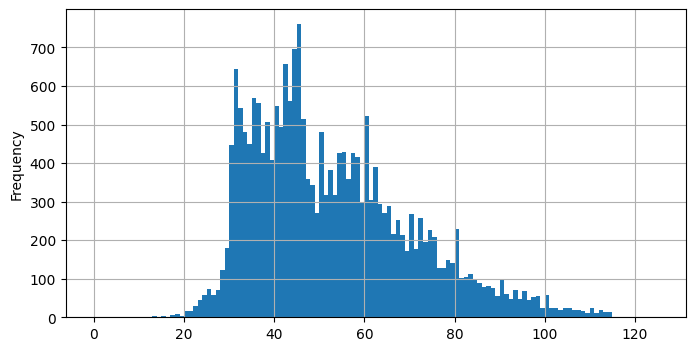

In [82]:
data['total_area'].plot(
    kind='hist',
    grid=True,
    bins=125,
    range=(0, 125),
    figsize=(8, 4)
)

Объявлений о продаже квартир с общей площадью примерно 45 кв. метров больше всего. Второй не сильно выраженный пик примерно около 30, и третий это от 50 до 60 кв. метров.

##### Жилая площадь

In [83]:
data['living_area'].describe()

count    21482.000000
mean        30.153565
std         12.763348
min          2.000000
25%         18.000000
50%         29.400000
75%         39.000000
max         93.600000
Name: living_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

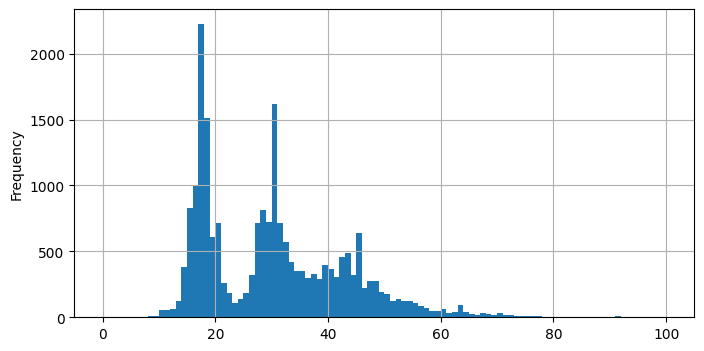

In [84]:
data['living_area'].plot(
    kind='hist',
    grid=True,
    bins=100,
    range=(0, 100),
    figsize=(8, 4)
)

На гистограмме жилой площади наблюдаются 4 пика 18, 30, 45 и 63. Эти значения почти что совпадают с медианой жилой площади для 0 или 1, 2-х, 3-х и 4-х комнатныж квартир.

In [85]:
data[data['rooms'].isin([0, 1, 2, 3, 4])].pivot_table(index='rooms', values='living_area', aggfunc='median')

,living_area
rooms,
0,18.0
1,17.6
2,30.5
3,44.0
4,55.9


Так же можно сказать что мысль заменять пустые значения в `living_area` медианой по количеству комнат в квартире была верной.

##### Площадь кухни

In [86]:
data['kitchen_area'].describe()

count    21276.000000
mean         9.529878
std          3.597145
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:ylabel='Frequency'>

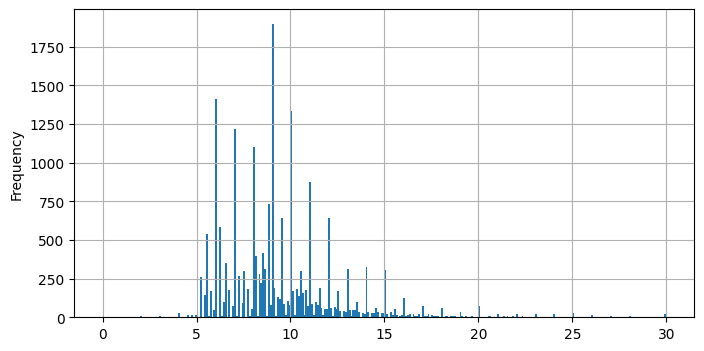

In [87]:
data['kitchen_area'].plot(
    kind='hist',
    grid=True,
    bins=300,
    range=(0, 30),
    figsize=(8, 4)
)

Для площади кухни наблюдаем частые значения 5, 6, 7, 8 и так далее примерно до 15 кв. метров

##### Цена объекта

In [88]:
(data['last_price'] / 1e6).describe()

count    21482.000000
mean         4.810619
std          2.191515
min          0.012190
25%          3.300000
50%          4.400000
75%          5.967301
max         11.900000
Name: last_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

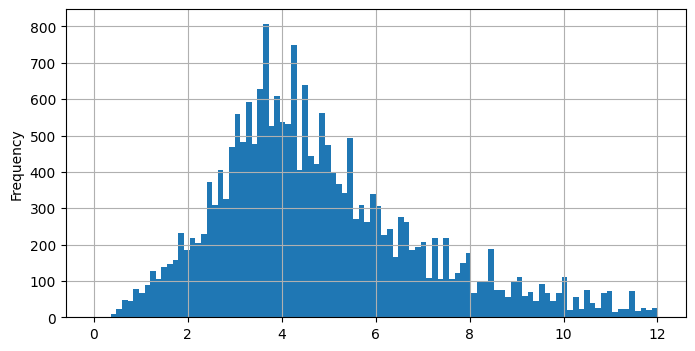

In [89]:
(data['last_price'] / 1e6).plot(
    kind='hist',
    grid=True,
    bins=100,
    range=(0, 12),
    figsize=(8, 4)
)

Гистограмма по цене квартир имеет только один выраженный пик со значеним ~3.7 млн.

##### Количество комнат

In [90]:
data['rooms'].describe()

count    21482.000000
mean         1.912950
std          0.889113
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

<AxesSubplot:ylabel='Frequency'>

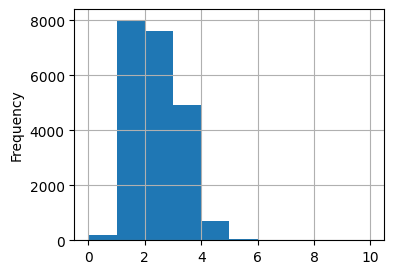

In [91]:
data['rooms'].plot(
    kind='hist',
    grid=True,
    bins=10,
    range=(0, 10),
    figsize=(4, 3)
)

По графику видно, что наиболее часто встречаются объявлени о продаже 1, 2-х и 3-х комнатных квартир.

Так же видно, что есть квартиры с количеством комнат `0`. Причины таких данных неясны, но ниже можно увидеть, что для таких квартир не указана площать кухни, но при этом жилая площадь указана. 

In [92]:
data[data['rooms'] == 0][['total_area', 'living_area', 'kitchen_area']].median()

total_area      26.0
living_area     18.0
kitchen_area     NaN
dtype: float64

##### Высота потолков

In [93]:
data['ceiling_height'].describe()

count    21482.000000
mean         2.671599
std          0.179763
min          2.300000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.800000
Name: ceiling_height, dtype: float64

<AxesSubplot:ylabel='Frequency'>

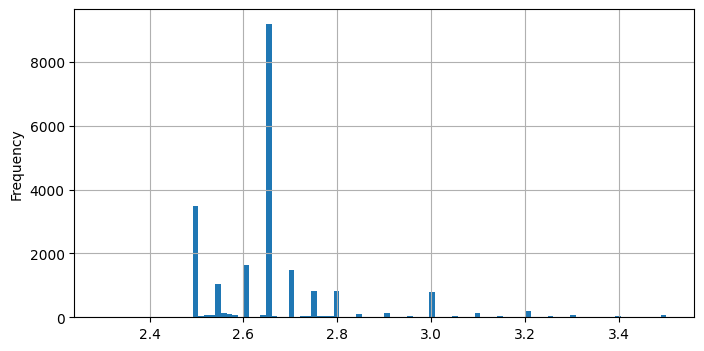

In [94]:
data['ceiling_height'].plot(
    kind='hist',
    grid=True,
    bins=100,
    range=(2.3, 3.5),
    figsize=(8, 4)
)

Видно большое количество квартир с высотой потолка 2.65 метра.

##### Этаж квартиры

In [95]:
data['floor'].describe()

count    21482.000000
mean         5.900987
std          4.913954
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

<AxesSubplot:ylabel='Frequency'>

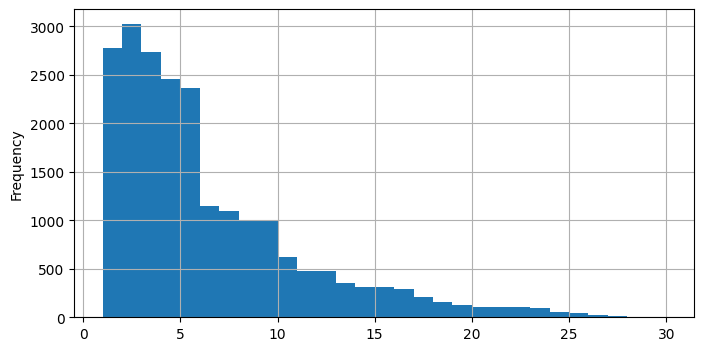

In [96]:
data['floor'].plot(
    kind='hist',
    grid=True,
    bins=29,
    range=(1, 30),
    figsize=(8, 4)
)

На гистограмме можно выделить две явные "ступеньки", для которых больше всего объявлений:
<ul>
    <li> первая - от 1 до 5
    <li> вторая от 6 до 9
</ul><br>
Скорее всего это связано с этажностью дома. Больше всего объявлений о продаже в 5- и 9-этажных домах.

In [97]:
data.groupby('floors_total')['floors_total'].count().sort_values(ascending=False).head()

floors_total
5.0     5392
9.0     3663
12.0    1267
16.0    1241
10.0    1059
Name: floors_total, dtype: int64

##### Тип этажа квартиры («первый», «последний», «другой»)

In [98]:
data['floor_type'].describe()

count      21482
unique         3
top       другой
freq       15747
Name: floor_type, dtype: object

<AxesSubplot:>

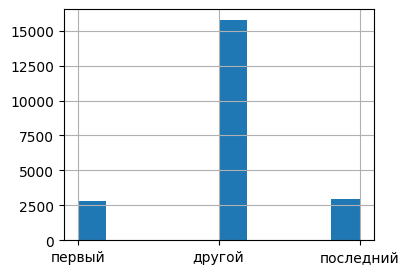

In [99]:
data['floor_type'].hist(figsize=(4, 3))

Видно, что большое число квартир - 15747, это квартиры не на первом или последнем этаже.

#####  Общее количество этажей в доме

In [100]:
data['floors_total'].describe()

count    21409.000000
mean        10.790415
std          6.644762
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

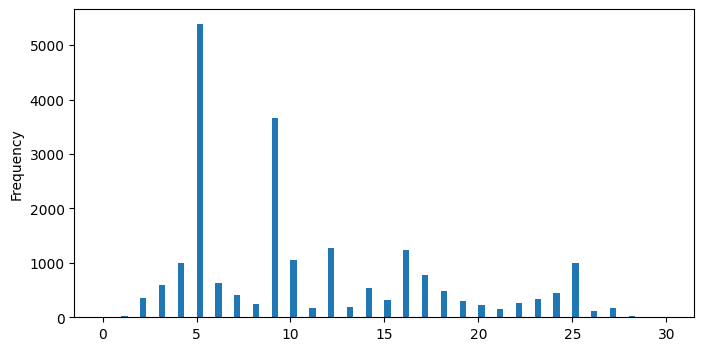

In [101]:
data['floors_total'].plot(
    kind='hist',
    grid=False,
    bins=90,
    range=(0, 30),
    figsize=(8, 4)
)

На графике видно 2 основные моды: это 5- и 9-этажные дома. Так же наблюдаются менее выраженные моды для 16-, 12-,  4-, 10- и 25-этажных домов

In [102]:
data.groupby('floors_total')['floors_total'].count().sort_values(ascending=False).head(10)

floors_total
5.0     5392
9.0     3663
12.0    1267
16.0    1241
10.0    1059
4.0      994
25.0     993
17.0     779
6.0      633
3.0      591
Name: floors_total, dtype: int64

#####  Расстояние до центра города в метрах

In [103]:
data['city_centers_nearest'].describe()

count    16017.000000
mean     15005.474683
std       8503.862817
min        208.000000
25%      10652.000000
50%      13648.000000
75%      16722.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

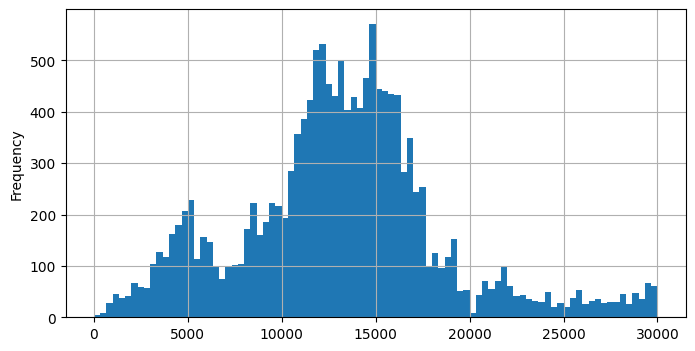

In [104]:
data['city_centers_nearest'].plot(
    kind='hist',
    grid=True,
    bins=90,
    range=(0, 30000),
    figsize=(8, 4)
)

По графику можно сказать, что большая часть продаваемых квартир находится примерно на расстоянии от 11000 до 17000 метров от центра города. При этом также наблюдается отдельная группа квартир с расстоянием до центра около 5000 метров.

#####  Расстояние до ближайшего аэропорта

In [105]:
data['airports_nearest'].describe()

count    16005.000000
mean     28912.812996
std      12994.435818
min          0.000000
25%      18041.000000
50%      27095.000000
75%      37636.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

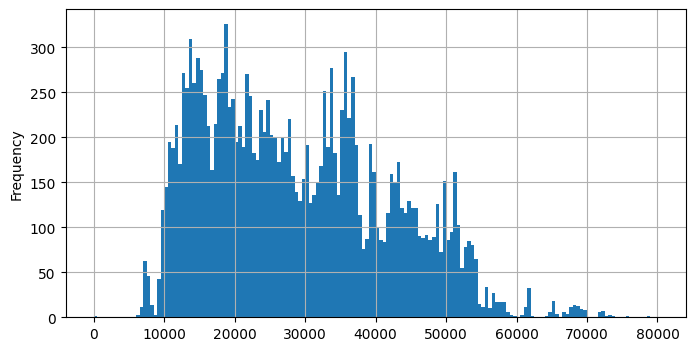

In [106]:
data['airports_nearest'].plot(
    kind='hist',
    grid=True,
    bins=160,
    range=(0, 80000),
    figsize=(8, 4)
)

По графику можно сказать, что подавляющее большинство продаваемых квартир находят на расстоянии от аэропорта в диапазоне от 10 км до 55 км.

#####  Расстояние до ближайшего парка

In [107]:
data['parks_nearest'].describe()

count    6649.000000
mean      489.912618
std       330.615845
min         1.000000
25%       289.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:ylabel='Frequency'>

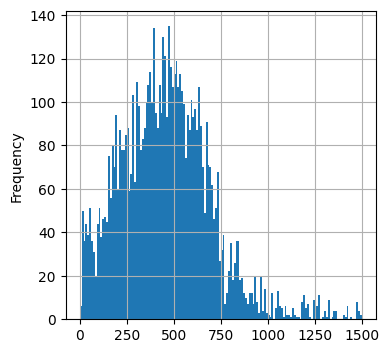

In [108]:
data['parks_nearest'].plot(
    kind='hist',
    grid=True,
    bins=150,
    range=(0, 1500),
    figsize=(4, 4)
)

Всего для 6649 квартир указанно расстояние до ближайшего парка, и для большей части этих квартир расстояние до ближайшего парка составлет до 700 метров.

#####  День и месяц публикации объявления

In [109]:
data['weekday_exposition'].describe()

count    21482.000000
mean         2.575040
std          1.793433
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

<AxesSubplot:title={'center':'0 — понедельник, 1 — вторник и так далее'}, ylabel='Frequency'>

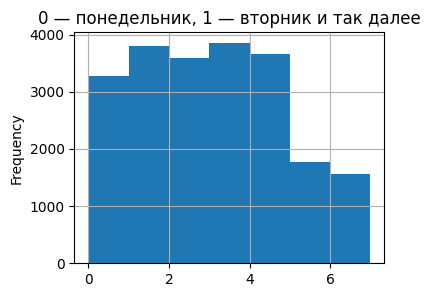

In [110]:
data['weekday_exposition'].plot(
    kind='hist',
    grid=True,
    bins=7,
    range=(0, 7),
    figsize=(4, 3),
    title='0 — понедельник, 1 — вторник и так далее'
)

Больше объявлений о продаже выставляли в будние дни. В выходные примерно в два раза меньше.

In [111]:
data['month_exposition'].describe()

count    21482.000000
mean         6.399730
std          3.490185
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

<AxesSubplot:title={'center':'1 - январь, 2 - февраль и так далее'}, ylabel='Frequency'>

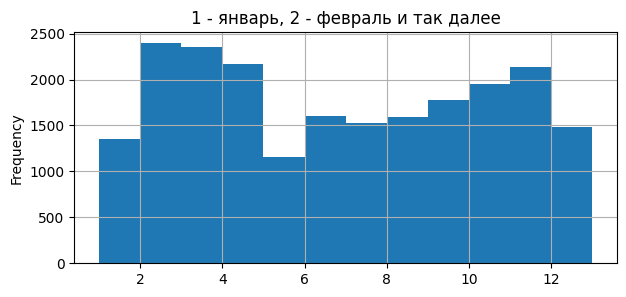

In [112]:
data['month_exposition'].plot(
    kind='hist',
    grid=True,
    bins=12,
    range=(1, 13),
    figsize=(7, 3),
    title='1 - январь, 2 - февраль и так далее'
)

В феврале, марте, апреле и ноябре было выставлено больше объявлений о продаже квартиры. <br>
Месяца с минимальным количеством объявлений - это январь, май.

#### Исследование скорости продажи квартир

In [113]:
data['days_exposition'].describe()

count    18866.000000
mean       172.130605
std        210.139696
min          1.000000
25%         43.000000
50%         91.000000
75%        218.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

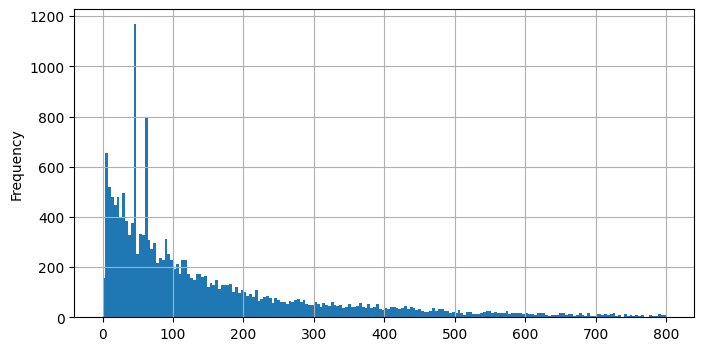

In [114]:
data['days_exposition'].plot(
    kind='hist',
    grid=True,
    bins=200,
    range=(0, 800),
    figsize=(8, 4),
)

В среднем квартиры продавались за 172 дней.<br>
Медианное значение - это 91 дней.<br>
Также на гистограмме сильно выражены две моды - это 45 и 60 дней (см. гистограмму ниже).<br>
На основе статистических параметров можно предположить, что:
<ul>
    <li> продажи не быстре 43 дней - это быстрые продажи, таких квартир 25 %.
    <li> продажи более 218 дней - долгие продажи, таких квартир тоже 25 %
</ul><br>
Так же есть необычно долгие продажи - 1580 дней.

<AxesSubplot:ylabel='Frequency'>

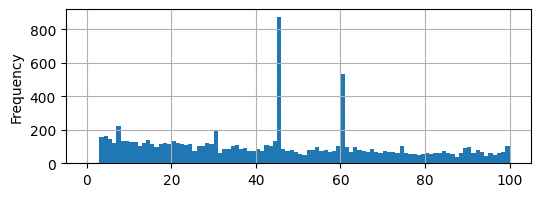

In [115]:
data['days_exposition'].plot(
    kind='hist',
    grid=True,
    bins=100,
    range=(0, 100),
    figsize=(6, 2),
)

#### Факторы, влияющие на общую стоимость объекта

##### Общая площадь

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

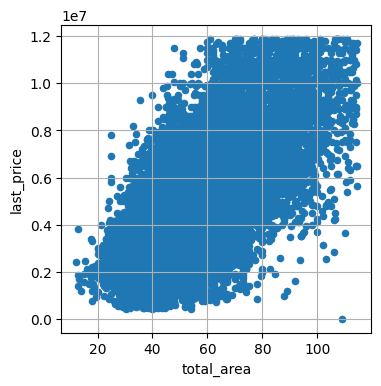

In [116]:
data.plot(
    kind='scatter',
    x='total_area',
    y='last_price',
    grid=True,
    figsize=(4, 4),
)

In [117]:
round(data['last_price'].corr(data['total_area']), 2)

0.7

Зависимость между стоимостью и общей площадью есть. Коэффициент корреляции 0.7.

##### Жилая площадь

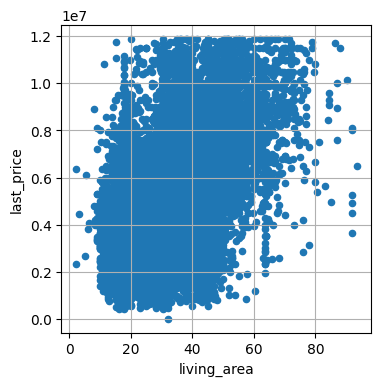

In [118]:
data.plot(
    kind='scatter',
    x='living_area',
    y='last_price',
    grid=True,
    figsize=(4, 4),
)
plt.show()

In [119]:
round(data['last_price'].corr(data['living_area']), 2)

0.54

Зависимость между стоимостью и жилой площадью есть. Коэффициент корреляции 0.54.

##### Площадь кухни

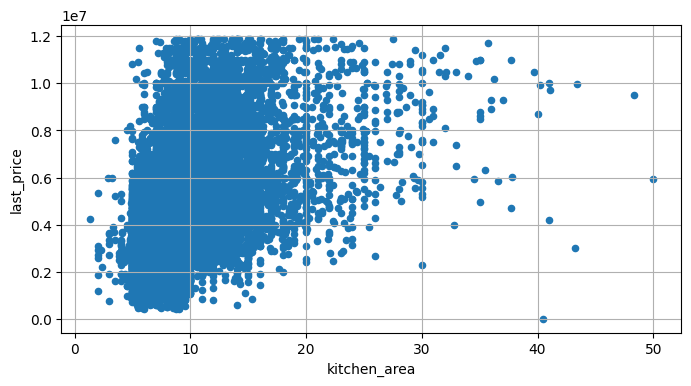

In [120]:
data.plot(
    kind='scatter',
    x='kitchen_area',
    y='last_price',
    grid=True,
    figsize=(8, 4),
)
plt.show()

In [121]:
round(data['last_price'].corr(data['kitchen_area']), 2)

0.46

По диаграмме рассеивания зависимость между ценой и площадью кухни сложно прослеживается. Коэффициент корреляции составляет всего 0.45.

##### Количество комнат

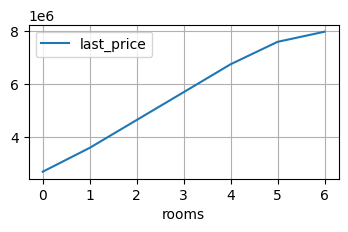

In [122]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(
    grid=True,
    figsize=(4, 2),
)
plt.show()

In [123]:
last_price_medians_by_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'median'])
last_price_medians_by_rooms.columns = ['flat_count', 'last_price_median']
last_price_medians_by_rooms

,flat_count,last_price_median
rooms,,
0,195,2700000
1,8005,3600000
2,7599,4650000
3,4912,5700000
4,704,6753851
5,63,7600000
6,4,7982000


Между медианной ценой и количеством комнат прослеживается явная линейная зависимость.

##### Тип этажа квартиры («первый», «последний», «другой»)

In [124]:
last_price_medians_by_floor_type = data.pivot_table(index='floor_type',
                                                    values='last_price', aggfunc='median')
last_price_medians_by_floor_type

,last_price
floor_type,
другой,4550000
первый,3800000
последний,4000000


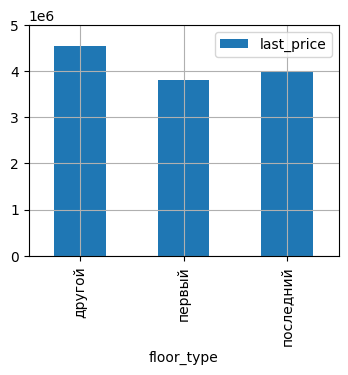

In [125]:
last_price_medians_by_floor_type.plot(
    kind='bar',
    grid=True,
    figsize=(4, 3),
    ylim=(0, 5e6)
)
plt.show()

Так как для разного типа этажа медианная цена квартиры разная, то можно сказать что заивисмость присутсует

##### Дата размещения (день недели, месяц, год)

In [126]:
last_price_medians_by_weekday_exposition = data.pivot_table(index='weekday_exposition',
                                                    values='last_price', aggfunc='median')
last_price_medians_by_weekday_exposition

,last_price
weekday_exposition,
0,4400000
1,4450000
2,4435000
3,4390000
4,4350000
5,4400000
6,4350000


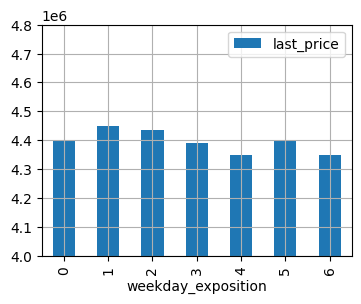

In [127]:
last_price_medians_by_weekday_exposition.plot(
    kind='bar',
    grid=True,
    figsize=(4, 3),
    ylim=(4e6, 4.8e6)
)
plt.show()

Видно, что зависимость цены от дня недели выставления на продажу минимальная.

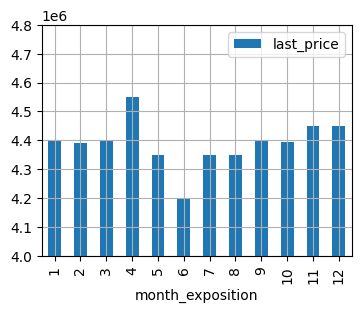

In [128]:
data.pivot_table(index='month_exposition', values='last_price', aggfunc='median').plot(
    kind='bar',
    grid=True,
    figsize=(4, 3),
    ylim=(4e6, 4.8e6)
)
plt.show()

Зависимость цены от месяца выставления на продажу тоже есть, и она уже более выраженная чем от дня недели.
Можно предположить, что такая зависимость обуславливается меняющейся обстановкой на рынке недвижимости в разное время года.

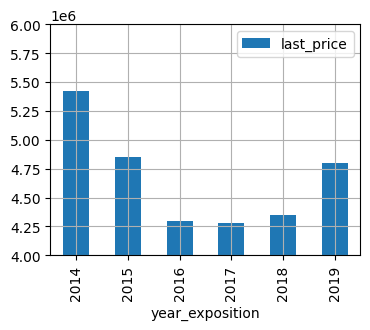

In [129]:
data.pivot_table(index='year_exposition', values='last_price', aggfunc='median').plot(
    kind='bar',
    grid=True,
    figsize=(4, 3),
    ylim=(4e6, 6e6)
)
plt.show()

Видно, что в 2014 году цены были значительно выше, чем в последующие 5 лет.

##### Выводы

 - Из факторов, для которых можно посчитать коррелицию с ценой квартиры, фактором с большей корреляцией является жилая площадь - коррелция составляет 0.7;
 - Также обнаружена логичная линейная зависимость цены квартиры от количества комант в квартире;
 - Отмечена не ярко выраженна зависимость от месяца размещени объявления о продаже;
 - Также отмечено значительное снижение цен после 2014 года.

#### Исследование стоимости квадратного метра

In [130]:
sq_meter_price_mean_by_locality = data.pivot_table(
    index='locality', values='square_meter_price', aggfunc=['count', 'mean'])
sq_meter_price_mean_by_locality.columns = ['flat_count', 'sq_meter_price_mean']
sq_meter_price_mean_by_locality.sort_values('flat_count', ascending=False, inplace=True)
sq_meter_price_mean_by_locality.head(10).sort_values('sq_meter_price_mean', ascending=False)

,flat_count,sq_meter_price_mean
locality,,
Санкт-Петербург,13629,105736.752513
Пушкин,337,100493.970326
деревня Кудрово,298,92409.768456
посёлок Парголово,326,90332.236196
посёлок Мурино,556,85681.758993
посёлок Шушары,437,78704.906178
Колпино,335,75221.868657
Гатчина,303,68664.000000
Всеволожск,394,67222.434010


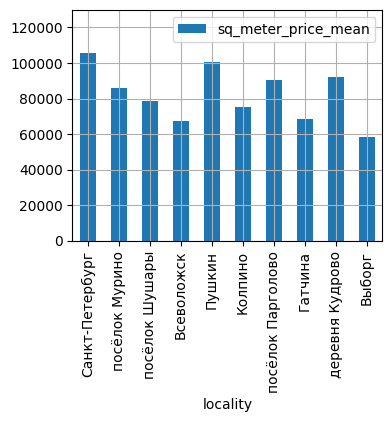

In [131]:
sq_meter_price_mean_by_locality.head(10).plot(
    kind='bar',
    y='sq_meter_price_mean',
    grid=True,
    figsize=(4, 3),
    ylim=(0, 130000)
)
plt.show()

In [132]:
sq_meter_price_mean_by_locality[sq_meter_price_mean_by_locality['flat_count'] == \
                                sq_meter_price_mean_by_locality.head(10)['flat_count'].min()]

,flat_count,sq_meter_price_mean
locality,,
Выборг,228,58225.640351


В таблице выше представлены 10 населённых пунктов с наибольшим числом объяявлений.<br>
Из них: 
 - __Санкт-Петербург__ c самой высокой средней стоимостью квадратного метра - 105737, и с наибольшим числом объявлений - 13629;
 - __Выборг__ с самой низкой средней стоимостью квадратного метра - 58226, и с наименьшим числом объявлений - 228.

In [133]:
sq_meter_price_mean_by_locality[sq_meter_price_mean_by_locality['sq_meter_price_mean'] == \
                                sq_meter_price_mean_by_locality['sq_meter_price_mean'].min()]

,flat_count,sq_meter_price_mean
locality,,
деревня Старополье,3,11206.333333


Наименьшая средняя цена за квадратный метр по всем объявлениям составляет 11206 в деревне Старополье

#### Исследование зависимости стоимости объектов от расстояния до центра города

In [134]:
mean_price_by_distance_to_center = (
    data.query('locality == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_in_km', values='last_price', aggfunc=['count', 'mean', 'median'])
)
mean_price_by_distance_to_center.columns = ['flat_count', 'mean_price', 'median_proce']
mean_price_by_distance_to_center

,flat_count,mean_price,median_proce
city_centers_nearest_in_km,,,
0.0,10,8.398000e+06,7600000
1.0,96,8.094719e+06,8250000
2.0,169,7.855586e+06,8000000
3.0,238,7.211516e+06,7225000
4.0,435,7.457014e+06,7490000
5.0,574,7.584839e+06,7470000
6.0,404,7.067391e+06,6794500
7.0,287,6.654031e+06,6300000
8.0,466,6.591626e+06,6282000


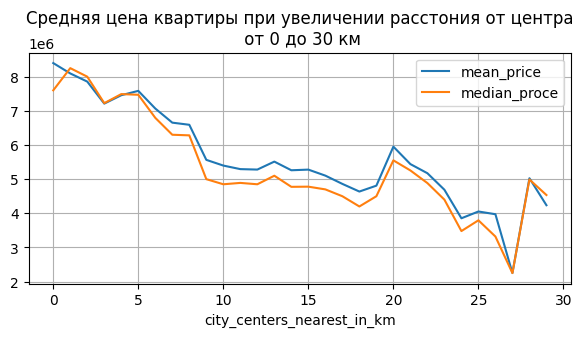

In [135]:
mean_price_by_distance_to_center.plot(
    y=['mean_price', 'median_proce'],
    grid=True,
    figsize=(7, 3),
    title='Средняя цена квартиры при увеличении расстония от центра\n от 0 до 30 км'
)
plt.show()

В целом наблюдается уменьшение средней цены квартиры при увеличении расстония от центра города, что логично.<br>
При этом на графике можно выделить следующие участки:
 - от 0 до 3 км: средняя цена снижается с 8.4 до 7.2 млн.
 - с 4 до 8 км: наблюдается всплеск до 7.6 млн. для 5 км и затем снижение до 6.6 млн. Всплеск на 5 км можно предположительно объяснить наличием у таких квартир дополнительно каких-то выдающихся характеристик. При необходимости нужно исследовать отдельно.
 - с 9 до 18 км: относительно плавное и равномерное снижение средней цены с 5.6 до 4.6 млн.
 - с 19 до 26: участок с всплеском до 5.95 млн. и дальнейшим снижением до 3.9 млн.
 - с 27 до 30 км: нехарактерный участок со снижением и повышением цены,обусловленный малым количеством квартир на этом участке: 1, 7 и 6 для 27, 28 и 29 км соответственно.

### Общий вывод

1. По общей информации
 - В датасете изначально представлено 23698 объявления о продаже квартир и 22 характеристики по каждому объявлению.
 - Из 22 признаков 14 имеют пропущенные значения:
    - самый менее заполненный признак `is_apartment`, в нём всего 2775 не нулевых значений
<br>
<br>
2. Предобработка данных
<br></ul>
 - Полностью заполнены пропуски в следующих признаках:
     - `ceiling_height` - медианным значением по всему столбцу
     - `living_area` - медианным значение по количеству комнат в квартире
     - `is_apartment` - наиболее частым значением - `False`
     - `balcony` - значением `0` на основе перположения, что пропуски это квартиры без балконов
     - `parks_around_in_3km_radius` и `ponds_around_in_3km_radius` - значением `0` (см. детали в соответствующих разделах 2.2.8.1 и 2.2.8.2).
<br>
 - Частично заполнены пропуски для `kitchen_area`. (Детали см. в соответствующем разделе 2.2.5)
<br>
<br>
 - Удалены неяявные дубликаты в названиях населённых пунктов: изначально было 364 уникальных населённых пункта, после устранения стало 318.
<br>
<br>
 - Обработаны аномальные значения:
     - заменены неправдоподобные значени для признака `ceiling_height` (см. детаи в разделе 2.5);
     - для признаков `last_price`, `rooms`  и `total_area` удалены аномальные значения.
<br></ul>
<br>
3. В датасет добавлены новые столбцы:
<br></ul>
 - `square_meter_price` — цена одного квадратного метра;
 - `weekday_exposition` — день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
 - `month_exposition` — месяц публикации объявления;
 - `year_exposition` — год публикации объявления;
 - `city_centers_nearest_in_km` — расстояние до центра города в километрах (переведите из м в км и округлите до целых значений);
 - `floor_type` — тип этажа квартиры (значения — «первый», «последний», «другой»).
<br></ul>
<br>
4. Исследовательский анализ данных
<br></ul>
   4.1 Исследование параметров объектов (квартир)
<br></ul>
   По результатам исследования параметров сделаны следующие выводы:
 - Объявлений о продаже квартир с площадью примерно 45 кв. метров больше всего. Второй не сильно выраженный пик примерно около 30, и третий это от 50 до 60 кв. метров;
 - На гистограмме жилой площади наблюдаются 4 пика 18, 30, 45 и 63. Эти значения почти что совпадают с медианой жилой площади для 0 или 1, 2-х, 3-х и 4-х комнатныж квартир;
 - Для площади кухни наблюдаем частые значения 5, 6, 7, 8 и так далее примерно до 15 кв. метров;
 - Гистограмма по цене квартир имеет только один явно выраженный пик со значеним ~3.7 млн.;
 - Наиболее часто встречаются объявления о продаже 1, 2-х и 3-х комнатных квартир. Среди объявлений есть квартиры с количеством комнат 0. Причины таких данных неясны, для таких квартир не указана площать кухни, но при этом жилая площадь указана;
 - Большое количество квартир с высотой потолка 2.65 метра;
 - На гистограмме по этажам квартиры можно выделить две явные "ступеньки", для которых больше всего объявлений:
    - первая - от 1 до 5
    - вторая от 6 до 9 
    - Это связано с этажностью дома. Больше всего объявлений о продаже в 5- и 9-этажных домах;
 - Большое число квартир - 15747, это квартиры не на первом или последнем этаже;
 - Большая часть продаваемых квартир находится примерно на расстоянии от 11000 до 17000 метров от центра города. При этом также наблюдается отдельная группа квартир с расстоянием до центра 5000 метров;
 - Подавляющее большинство продаваемых квартир находят на расстоянии от аэропорта в диапазоне от 10 км до 55 км;
 - Всего для 6649 квартир указанно расстояние до ближайшего парка, и для большей части этих квартир расстояние до ближайшего парка составлет до 700 метров;
 - Больше объявлений о продаже выставляли в будние дни. В выходные примерно в два раза меньше;
 - В феврале, марте, апреле и ноябре было выставлено больше объявлений о продаже квартиры.
 - Месяца с минимальным количеством объявлений - это январь, май.
<br></ul>
<br>
   4.2 Исследование скорости продажи квартир
 - В среднем квартиры продавались за 172 дней.
 - Медианное значение - это 91 дней.
 - Также сильно выражены две значения - это 45 и 60 дней.
 - На основе статистических параметров можно предположить, что:
   - продажи не быстре 43 дней - это быстрые прода, таких квартир 25 %;
   - продажи более 218 дней - долгие продажи, таких квартир тоже 25 %.
 - Также обнаружена необычно долгая продажа - 1580 дней.
<br></ul>
<br>
   4.3 Факторы, влияющие на общую стоимость объекта
<br></ul>
 - Из факторов, для которых можно посчитать коррелицию с ценой квартиры, фактором с большей корреляцией является жилая площадь - коррелция составляет 0.7.
 - Также обнаружена логичная линейная зависимость цены квартиры от количества комнат в квартире. 
 - Отмечена не ярко выраженна зависимость от месяца размещения объявления о продаже.
 - Также отмечено заметное снижение цен после 2014 года.
<br></ul>
<br>
   4.4 Исследование стоимости квадратного метра
<br></ul>
Среди 10 населённых пунктов с наибольшим числом объявлений:
 - Санкт-Петербург c самой высокой средней стоимостью квадратного метра - 105737, и с наибольшим числом объявлений - 13629;
 - Выборг с самой низкой средней стоимостью квадратного метра - 58226, и с наименьшим числом объявлений - 228.
<br></ul>
<br>
   4.5 Исследование зависимости стоимости объектов от расстояния до центра города
<br></ul>
В целом наблюдается уменьшение средней цены квартиры при увеличении расстония от центра города, что логично.<br>
При этом на графике зависимости цены от расстояния можно выделить следующие участки:
 - от 0 до 3 км: средняя цена снижается с 8.4 до 7.2 млн.
 - с 4 до 8 км: наблюдается всплеск до 7.6 млн. для 5 км и затем снижение до 6.6 млн. Всплеск на 5 км можно предположительно объяснить наличием у таких квартир дополнительно каких-то выдающихся характеристик. При необходимости нужно исследовать отдельно.
 - с 9 до 18 км: относительно плавное и равномерное снижение средней цены с 5.6 до 4.6 млн.
 - с 19 до 26: участок с всплеском до 5.95 млн. и дальнейшим снижением до 3.9 млн.
 - с 27 до 30 км: нехарактерный участок со снижением и повышением цены,обусловленный малым количеством квартир на этом участке: 1, 7 и 6 для 27, 28 и 29 км соответственно.



